# Documentation

### Librosa
librosa is a python package for music and audio analysis. 
It provides the building blocks necessary to create music information retrieval systems. 
Librosa is a Python library for analyzing and extracting features from audio signals. 
It's commonly used in tasks like music information retrieval, audio classification, and speech recognition

#### Load an example audio file
y, sr = librosa.load(librosa.example('trumpet')) 
y is a numpy array containing the audio time series, and sr is the sampling rate of y.

Playing Audio To play audio, you can use IPython's display module: 
code-> import IPython.display as ipd ipd.Audio(y, rate=sr)

Displaying Waveforms Librosa provides functions to visualize waveforms: 
code-> import librosa.display import matplotlib.pyplot as plt plt.figure(figsize=(10, 4)) 
       librosa.display.waveshow(y, sr=sr) 
       plt.title('Waveform') plt.show()


### Mel-Frequency Cepstral Coefficients (MFCC)
Mel-Frequency Cepstral Coefficients (MFCC) are widely used in speech and audio processing applications. 
They capture the power spectrum of a sound signal and are particularly effective in representing the timbral aspects of sound.

Compute the MFCCs Now, let's compute the MFCCs: 
code-> import librosa.display import matplotlib.pyplot as plt

Compute MFCCs
code-> mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

Display the MFCCs
code-> plt.figure(figsize=(10, 6)) librosa.display.specshow(mfccs, x_axis='time') plt.colorbar() plt.title('MFCC') plt.tight_layout() plt.show() n_mfcc specifies the number of MFCCs to return. The default is 20, but 13 is commonly used

# Audio Classification Data Preprocessing

## EDA part (Exploratory data analysis )

In [1]:
### Let's read a sample audio using librosa

# y, sr = librosa.load(librosa.example('trumpet')) 
# y is a numpy array containing the audio time series, and sr is the sampling rate of y.

# librosa_audio_data: 
# This variable stores the audio time series as a NumPy array. 
# Each element in this array represents the amplitude of the audio signal at a specific point in time. 
# If the audio file is stereo, the array will have two dimensions (channels and samples), 
# otherwise it will be a one-dimensional array.

# librosa_sample_rate: 
# This variable stores the sample rate of the audio file. 
# The sample rate is the number of samples per second of audio. 
# By default, librosa.load resamples the audio to 22050 Hz (22.05 kHz), 
# but this can be changed by specifying a different sample rate in the sr parameter of the librosa.load function.

import librosa
audio_file_path='UrbanSound8K/dog_bark.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [2]:
print(librosa_audio_data)

[-4.1909516e-09 -1.9790605e-09 -1.6298145e-09 ...  6.3789585e-03
  2.4849751e-03 -3.8281479e-04]


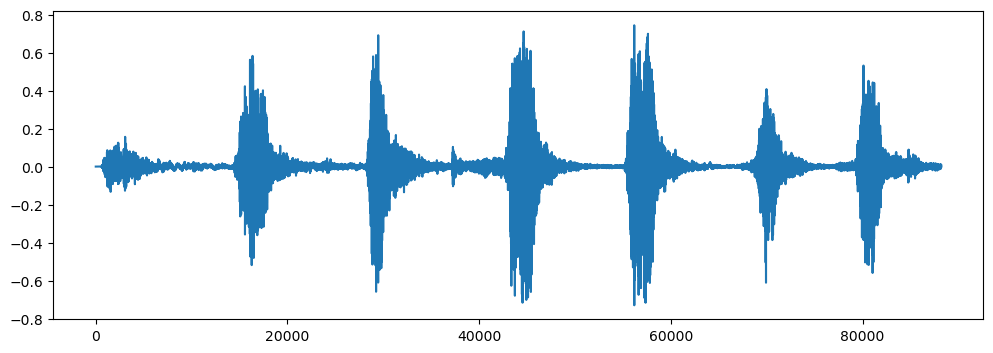

In [3]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

#### Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [4]:
### Lets read with scipy
# SciPy is an open-source Python library used for scientific and technical computing. 
# It builds on NumPy, providing a large collection of algorithms and functions for 
# various scientific and engineering applications.

from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [5]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [-220,  193],
       [-211,  203],
       [-169,  209]], dtype=int16)

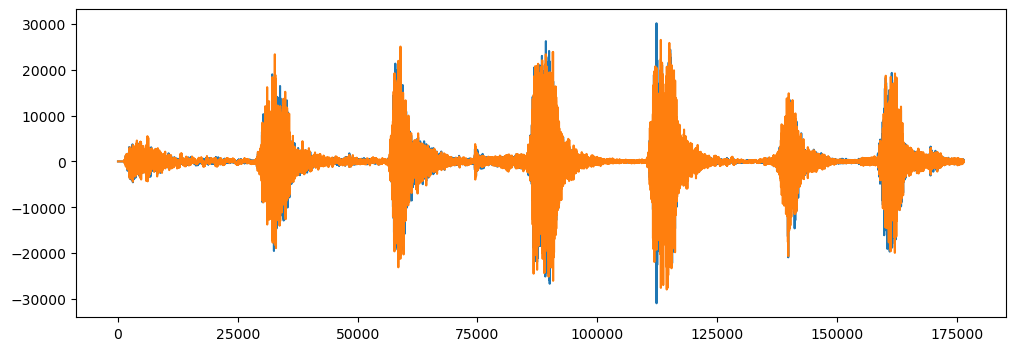

In [6]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio 
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

Mel-Frequency Cepstral Coefficients (MFCCs) are a feature commonly used in audio and speech processing, particularly in tasks like speech recognition, speaker identification, and audio classification. They provide a compact representation of the spectral properties of a sound signal. 



In [7]:
# Extract MFCC features
# #### code->
# mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # n_mfcc is the number of MFCCs to return

# Display the MFCCs
# #### code->
# plt.figure(figsize=(10, 4))
# librosa.display.specshow(mfccs, x_axis='time')
# plt.colorbar()
# plt.title('MFCC')
# plt.tight_layout()
# plt.show()

mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)


(40, 173)


In [8]:
mfccs

array([[-5.4015735e+02, -3.8647202e+02, -2.9487515e+02, ...,
        -3.2097778e+02, -3.2452640e+02, -3.4993683e+02],
       [ 3.7687950e+01,  9.8727448e+01,  1.0977669e+02, ...,
         8.7304565e+01,  7.9169693e+01,  7.7821648e+01],
       [-2.8607426e+01, -1.0099413e+02, -1.2499402e+02, ...,
        -5.6868019e+01, -6.1326279e+01, -5.8022282e+01],
       ...,
       [ 4.2923915e-01, -3.9176333e-01,  5.5127859e+00, ...,
         3.8616018e+00,  2.6449604e+00,  3.9021311e+00],
       [ 1.3075358e+00, -2.0271206e+00, -3.7877610e+00, ...,
         4.3491716e+00,  3.2855082e+00,  4.7606778e+00],
       [ 5.8787079e+00,  8.7677631e+00,  2.6843090e+00, ...,
        -6.5524168e+00, -2.4216237e+00,  7.2140956e-01]], dtype=float32)

In [9]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [10]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)    
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

#     This line computes the mean of the MFCC features along the time axis. 
#     Here's the breakdown:
#     mfccs_features.T: Transposes the MFCC feature matrix so that each row corresponds to a time frame 
#                       and each column corresponds to a specific MFCC coefficient.
#     np.mean(mfccs_features.T, axis=0): Calculates the mean of each MFCC coefficient across all time frames, 
#                       resulting in a single vector of 40 elements (since n_mfcc=40).       
#     The resulting mfccs_scaled_features is a one-dimensional NumPy array containing the mean value of 
#     each MFCC coefficient across the entire audio signal, providing a compact representation of the audio file.

In [11]:
# for index_num,row in tqdm(metadata.iterrows()):
# This loop iterates over each row in the metadata DataFrame. 
# metadata seems to be a DataFrame containing information about audio files, including file names, 
# class labels, and fold numbers. iterrows() is a pandas DataFrame method that returns an iterator yielding index 
# and row data for each row in the DataFrame.

# file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
# This line constructs the full path to the audio file using information from 
# the current row of the DataFrame. It uses os.path.join() to join the base path audio_dataset_path 
# with the folder number and the file name from the DataFrame row.

import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [05:56, 10.17it/s]C:\Users\DELL\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8325it [13:17, 15.24it/s]C:\Users\DELL\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [13:53, 10.48it/s]


In [12]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [13]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [14]:
X.shape

(8732, 40)

In [15]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [16]:
# from tensorflow.keras.utils import to_categorical
# from sklearn.preprocessing import LabelEncoder
# These lines import necessary libraries. to_categorical from 
# tensorflow.keras.utils is used to convert class labels to one-hot encoded format, 
# and LabelEncoder from sklearn.preprocessing is used to encode categorical integer features as a one-hot or ordinal array.

# y=to_categorical(labelencoder.fit_transform(y))
# This line performs the following steps:
# labelencoder.fit_transform(y): 
# This fits the labelencoder to the target variable y 
# and transforms the class labels in y into encoded integer values. 
# Each unique class label in y is assigned a unique integer.
# to_categorical():
# This function from Keras converts the integer-encoded class labels into one-hot encoded vectors. 
# Each integer-encoded class label is converted into a binary vector where the index corresponding to 
# the class label is marked with a 1 and all other indices are marked with 0s.
# For example, if y originally contained class labels ["cat", "dog", "cat", "bird"], 
# after fit_transform() it might be transformed to [0, 1, 0, 2], and after to_categorical(), 
# it would be converted to the following one-hot encoded format:


### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [17]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665260e+00, -1.36902380e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305080e+00, -5.27745247e+00, -1.55697155e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920441e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939763e+00, ...,
         7.42641389e-01,  7.33490944e-01,  7.11009085e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811938e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651139e+00]], dtype=float32)

In [20]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
X_train.shape

(6985, 40)

In [22]:
X_test.shape

(1747, 40)

In [23]:
y_train.shape

(6985, 10)

In [24]:
y_test.shape

(1747, 10)

### Model Creation

In [25]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [26]:
# The Sequential model is a linear stack of layers used for building deep learning models.
# Dense: This layer represents a fully connected layer in a neural network.
# Dropout: This layer applies dropout regularization to prevent overfitting during training by randomly setting a fraction of input units to zero.
# Activation: This layer applies an activation function element-wise to the output of the previous layer.
# Flatten: This layer flattens the input, transforming it into a 1D array, typically used to connect a convolutional layer with a fully connected layer.
# the Adam optimizer from TensorFlow's Keras API. Adam is an optimization algorithm that computes adaptive learning rates for each parameter.


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [27]:
### No of classes
num_labels=y.shape[1]

In machine learning, particularly in training neural networks, dropout is a regularization technique used to prevent overfitting. Setting the dropout rate to 0.5 is a common practice. Here’s a detailed explanation of why and how dropout works, and why 0.5 is often chosen:

Understanding Dropout
Dropout is a technique where, during each training iteration, a fraction of neurons in the network is randomly "dropped out" or set to zero. This means that these neurons do not participate in the forward pass and do not contribute to the backpropagation of gradients during that iteration.

How Dropout Works
Randomly Drop Neurons: During each training iteration, neurons (or units) are randomly deactivated.
Independent Dropping: Each neuron is independently deactivated with a certain probability, 
𝑝
p, which is the dropout rate.
Scaling During Training: To maintain the overall scale of the inputs, the remaining active neurons' outputs are scaled by 
1
1
−
𝑝
1−p
1
​
  during training.
No Dropout During Inference: During inference (or testing), all neurons are used, but their outputs are scaled down by the dropout rate to maintain consistency with training.
Why Use Dropout?
Prevents Overfitting: Dropout helps prevent the network from becoming too specialized to the training data, which can result in poor generalization to new data. By randomly deactivating neurons, the network is forced to learn redundant representations, which helps in generalization.
Implicit Ensemble: Dropout can be seen as an approximation of training a large number of different neural networks and then averaging their predictions. Each dropout mask effectively trains a slightly different network, making the final model robust.
Encourages Redundancy: It encourages the network to learn more robust features since any neuron might be dropped out, and other neurons must compensate for it.
Why Dropout = 0.5?
Setting the dropout rate to 0.5 is a common practice, especially in hidden layers, due to the following reasons:

Effective Balance: A dropout rate of 0.5 means that, on average, half of the neurons in the layer are dropped out during each iteration. This strikes a balance between underfitting and overfitting, providing a strong regularization effect without losing too much information.
Promotes Diverse Learning: Dropping out half of the neurons forces the network to learn representations that do not rely too heavily on any single neuron, leading to more diverse and robust feature learning.
Research Evidence: Empirical studies have shown that a dropout rate of 0.5 often provides good performance across various tasks and architectures, particularly in fully connected layers of deep networks.

In [28]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [30]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [31]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
211/219 [===========================>..] - ETA: 0s - loss: 10.7423 - accuracy: 0.1210
Epoch 1: val_loss improved from inf to 2.29266, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 3s 6ms/step - loss: 10.4858 - accuracy: 0.1223 - val_loss: 2.2927 - val_accuracy: 0.1093
Epoch 2/100
  1/219 [..............................] - ETA: 3s - loss: 2.8847 - accuracy: 0.1875

C:\Users\DELL\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


210/219 [===========================>..] - ETA: 0s - loss: 2.5634 - accuracy: 0.1189
Epoch 2: val_loss improved from 2.29266 to 2.28170, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.5615 - accuracy: 0.1180 - val_loss: 2.2817 - val_accuracy: 0.1088
Epoch 3/100
211/219 [===========================>..] - ETA: 0s - loss: 2.3386 - accuracy: 0.1183
Epoch 3: val_loss improved from 2.28170 to 2.26871, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.3367 - accuracy: 0.1173 - val_loss: 2.2687 - val_accuracy: 0.1191
Epoch 4/100
214/219 [============================>.] - ETA: 0s - loss: 2.2766 - accuracy: 0.1241
Epoch 4: val_loss improved from 2.26871 to 2.20705, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.2761 - accuracy: 0.1236 - val_loss: 2.2070 - val_accuracy: 0.1345
Epoch 5

219/219 [==============================] - 1s 4ms/step - loss: 1.4740 - accuracy: 0.4789 - val_loss: 1.2543 - val_accuracy: 0.5953
Epoch 27/100
211/219 [===========================>..] - ETA: 0s - loss: 1.4451 - accuracy: 0.4945
Epoch 27: val_loss improved from 1.25431 to 1.25064, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.4457 - accuracy: 0.4931 - val_loss: 1.2506 - val_accuracy: 0.5816
Epoch 28/100
207/219 [===========================>..] - ETA: 0s - loss: 1.4056 - accuracy: 0.5159
Epoch 28: val_loss improved from 1.25064 to 1.22846, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.4115 - accuracy: 0.5158 - val_loss: 1.2285 - val_accuracy: 0.6027
Epoch 29/100
217/219 [============================>.] - ETA: 0s - loss: 1.4212 - accuracy: 0.5076
Epoch 29: val_loss improved from 1.22846 to 1.22386, saving model to saved_models\audio_classific

Epoch 52/100
210/219 [===========================>..] - ETA: 0s - loss: 1.1033 - accuracy: 0.6314
Epoch 52: val_loss did not improve from 0.91461
219/219 [==============================] - 1s 4ms/step - loss: 1.1052 - accuracy: 0.6304 - val_loss: 0.9391 - val_accuracy: 0.6932
Epoch 53/100
203/219 [==========================>...] - ETA: 0s - loss: 1.0898 - accuracy: 0.6325
Epoch 53: val_loss did not improve from 0.91461
219/219 [==============================] - 1s 4ms/step - loss: 1.0985 - accuracy: 0.6309 - val_loss: 0.9511 - val_accuracy: 0.6909
Epoch 54/100
208/219 [===========================>..] - ETA: 0s - loss: 1.1098 - accuracy: 0.6253
Epoch 54: val_loss improved from 0.91461 to 0.90541, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.1107 - accuracy: 0.6253 - val_loss: 0.9054 - val_accuracy: 0.6961
Epoch 55/100
215/219 [============================>.] - ETA: 0s - loss: 1.1053 - accuracy: 0.6320
Epoch 55: v

215/219 [============================>.] - ETA: 0s - loss: 1.0142 - accuracy: 0.6640
Epoch 79: val_loss improved from 0.80620 to 0.79708, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 1.0133 - accuracy: 0.6644 - val_loss: 0.7971 - val_accuracy: 0.7447
Epoch 80/100
215/219 [============================>.] - ETA: 0s - loss: 1.0095 - accuracy: 0.6653
Epoch 80: val_loss did not improve from 0.79708
219/219 [==============================] - 1s 4ms/step - loss: 1.0134 - accuracy: 0.6634 - val_loss: 0.8347 - val_accuracy: 0.7321
Epoch 81/100
219/219 [==============================] - ETA: 0s - loss: 1.0142 - accuracy: 0.6669
Epoch 81: val_loss did not improve from 0.79708
219/219 [==============================] - 1s 4ms/step - loss: 1.0142 - accuracy: 0.6669 - val_loss: 0.8385 - val_accuracy: 0.7447
Epoch 82/100
205/219 [===========================>..] - ETA: 0s - loss: 1.0077 - accuracy: 0.6686
Epoch 82: val_loss did n

In [32]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7572982311248779


In [33]:
prediction_feature.shape

NameError: name 'prediction_feature' is not defined

In [34]:
X_test[1]

array([-466.17957   ,    1.0950238 ,  -34.01389   ,   35.33935   ,
        -14.88148   ,  -19.12843   ,   -0.581684  ,  -16.130579  ,
        -21.339075  ,    7.673634  ,  -29.16449   ,  -18.950253  ,
         -2.9579995 ,   -8.162329  ,  -15.153101  ,   -6.604805  ,
         -7.5685983 ,    9.340646  ,   14.4331    ,   21.934181  ,
         20.861397  ,    1.3340122 ,  -19.228804  ,   -4.630231  ,
         -1.0564746 ,    3.215267  ,   -6.984281  ,  -16.414577  ,
        -10.0286455 ,   13.009956  ,    0.53346074,  -23.843391  ,
        -15.267321  ,    9.245734  ,   10.367627  ,   -0.5832011 ,
         -1.2624055 ,   17.700016  ,   13.847462  ,   -5.1862826 ],
      dtype=float32)

In [35]:
# model.predict_classes(X_test)

predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

55/55 [==============================] - 0s 2ms/step


In [36]:
filename='UrbanSound8K/dog_bark.wav'
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
# model.predict_classes(prediction_feature)
predict_x=model.predict(prediction_feature) 
classes_x=np.argmax(predict_x,axis=1)
classes_x

1/1 [==============================] - 0s 31ms/step


array([1], dtype=int64)

### Testing Some Test Audio Data

Steps
- Preprocess the new audio data
- predict the classes
- Invere transform your Predicted Label

In [37]:
filename="UrbanSound8K/ac2.mp3"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

# predicted_label=model.predict_classes(mfccs_scaled_features)
predict_x=model.predict(mfccs_scaled_features) 
classes_x=np.argmax(predict_x,axis=1)


print(classes_x)
prediction_class = labelencoder.inverse_transform(classes_x) 
prediction_class

[-118.143524     97.6258       -1.32591      39.189953      9.521269
   24.679296     -7.049761     26.10349       4.553523     23.887688
   -2.3238766    12.437361     -5.193721     16.3461       -0.53154
   -3.0087066     9.521532     10.106387     -2.3604097     2.130967
    1.2017066     9.2456665    -2.747806      1.7060151     3.5891285
    2.1265557     2.6058114     1.2739449     3.0293717     0.7882232
    0.6772803    -1.267061     -0.20241337    1.0510194    -1.9062918
   -2.5263903     3.2206306     1.3740118    -0.22198275   -5.7659554 ]
[[-118.143524     97.6258       -1.32591      39.189953      9.521269
    24.679296     -7.049761     26.10349       4.553523     23.887688
    -2.3238766    12.437361     -5.193721     16.3461       -0.53154
    -3.0087066     9.521532     10.106387     -2.3604097     2.130967
     1.2017066     9.2456665    -2.747806      1.7060151     3.5891285
     2.1265557     2.6058114     1.2739449     3.0293717     0.7882232
     0.6772803    -1.2

array(['engine_idling'], dtype='<U16')